In [1]:
# References
# https://www.kaggle.com/code/farizdarari/simple-map-visualization-using-geopandas
# https://sulut.bps.go.id/id/statistics-table/2/OTU4IzI=/jumlah-penduduk-menurut-provinsi-diindonesia.html
# https://www.bps.go.id/id/statistics-table/3/VUZwV01tSlpPVlpsWlRKbmMxcFhhSGhEVjFoUFFUMDkjMw==/luas-daerah-dan-jumlah-pulau-menurut-provinsi.html
# https://github.com/Vizzuality/growasia_calculator/tree/master/public

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
# Population density obtained from (Population / Area (km^2))
# Population in 1000

df_map = gpd.read_file("indonesia.geojson")
df_pop = gpd.read_file("penduduk_detail.csv")

# Rename and sorting

df_map.replace("Bangka-Belitung", "Kep. Bangka Belitung", inplace=True)
df_map.replace("Kepulauan Riau", "Kep. Riau", inplace=True)
df_map.replace("Yogyakarta", "DI Yogyakarta", inplace=True)
df_map.replace("Jakarta Raya", "DKI Jakarta", inplace=True)

df_map["state"] = pd.Categorical(df_map["state"], categories=df_pop["Provinsi"], ordered=True)
df_map = df_map.sort_values("state") # Provinsi
df_map = df_map.reset_index(drop=True)

print(df_pop.head())
print(df_map.head())

  No        Provinsi Penduduk_2024 Luas_Wilayah_km2 Kepadatan_Penduduk_2024
0  1            Aceh        5554.8         56834.75             97.73598019
1  2  Sumatera Utara       15588.5         72460.74             215.1302899
2  3  Sumatera Barat        5836.2         42119.54             138.5627668
3  4            Riau        6728.1          89935.9             74.80994797
4  5           Jambi        3724.3         49026.58             75.96491536
   cartodb_id    country  id_1                     slug           state  \
0          16  Indonesia     1           indonesia-aceh            Aceh   
1          20  Indonesia    33  indonesia-sumaterautara  Sumatera Utara   
2           2  Indonesia    31  indonesia-sumaterabarat  Sumatera Barat   
3          12  Indonesia    25           indonesia-riau            Riau   
4          34  Indonesia     9          indonesia-jambi           Jambi   

                                            geometry  
0  MULTIPOLYGON (((97.97681 4.6275, 98

In [4]:
df_pop = df_pop.iloc[:, 2:].apply(pd.to_numeric)
print(df_pop.dtypes)
df_pop.head()

Penduduk_2024              float64
Luas_Wilayah_km2           float64
Kepadatan_Penduduk_2024    float64
dtype: object


,Penduduk_2024,Luas_Wilayah_km2,Kepadatan_Penduduk_2024
0,5554.8,56834.75,97.735980
1,15588.5,72460.74,215.130290
2,5836.2,42119.54,138.562767
3,6728.1,89935.90,74.809948
4,3724.3,49026.58,75.964915


In [5]:
# Combine map data and population (also in data

#df = pd.concat([df_map, df_pop.iloc[:,1:]], axis=1)
df = pd.concat([df_map, df_pop], axis=1)

In [6]:
df

,cartodb_id,country,id_1,slug,state,geometry,Penduduk_2024,Luas_Wilayah_km2,Kepadatan_Penduduk_2024
0,16,Indonesia,1,indonesia-aceh,Aceh,"MULTIPOLYGON (((97.97681 4.6275, 98.00173 4.60...",5554.8,56834.75,97.735980
1,20,Indonesia,33,indonesia-sumaterautara,Sumatera Utara,"MULTIPOLYGON (((98.71384 3.76947, 99.05473 3.6...",15588.5,72460.74,215.130290
2,2,Indonesia,31,indonesia-sumaterabarat,Sumatera Barat,"MULTIPOLYGON (((99.17167 -1.5025, 99.205 -1.52...",5836.2,42119.54,138.562767
3,12,Indonesia,25,indonesia-riau,Riau,"MULTIPOLYGON (((101.91405 -0.92096, 101.84528 ...",6728.1,89935.90,74.809948
4,34,Indonesia,9,indonesia-jambi,Jambi,"MULTIPOLYGON (((102.08648 -2.76824, 101.98974 ...",3724.3,49026.58,75.964915
5,21,Indonesia,32,indonesia-sumateraselatan,Sumatera Selatan,"MULTIPOLYGON (((104.92973 -2.35417, 105.00714 ...",8837.3,86771.68,101.845441
6,24,Indonesia,5,indonesia-bengkulu,Bengkulu,"MULTIPOLYGON (((102.56528 -4.17972, 102.28 -3....",2112.2,20128.34,104.936622
7,11,Indonesia,19,indonesia-lampung,Lampung,"MULTIPOLYGON (((105.81611 -5.57617, 105.79945 ...",9419.6,33570.26,280.593597
8,7,Indonesia,3,indonesia-bangkabelitung,Kep. Bangka Belitung,"MULTIPOLYGON (((105.34754 -1.84469, 105.39079 ...",1531.5,16690.13,91.760819
9,9,Indonesia,18,indonesia-kepulauanriau,Kep. Riau,"MULTIPOLYGON (((103.99194 1.13472, 104.01361 1...",2183.3,8269.71,264.011676


In [7]:
# Function for plotting map

def plot_map(df_input, column_name):
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))
    df_input.plot(column=column_name, 
            ax=ax, legend=True, cmap='coolwarm', 
            vmin=min(df[column_name]), 
            vmax=max(df[column_name])
           )

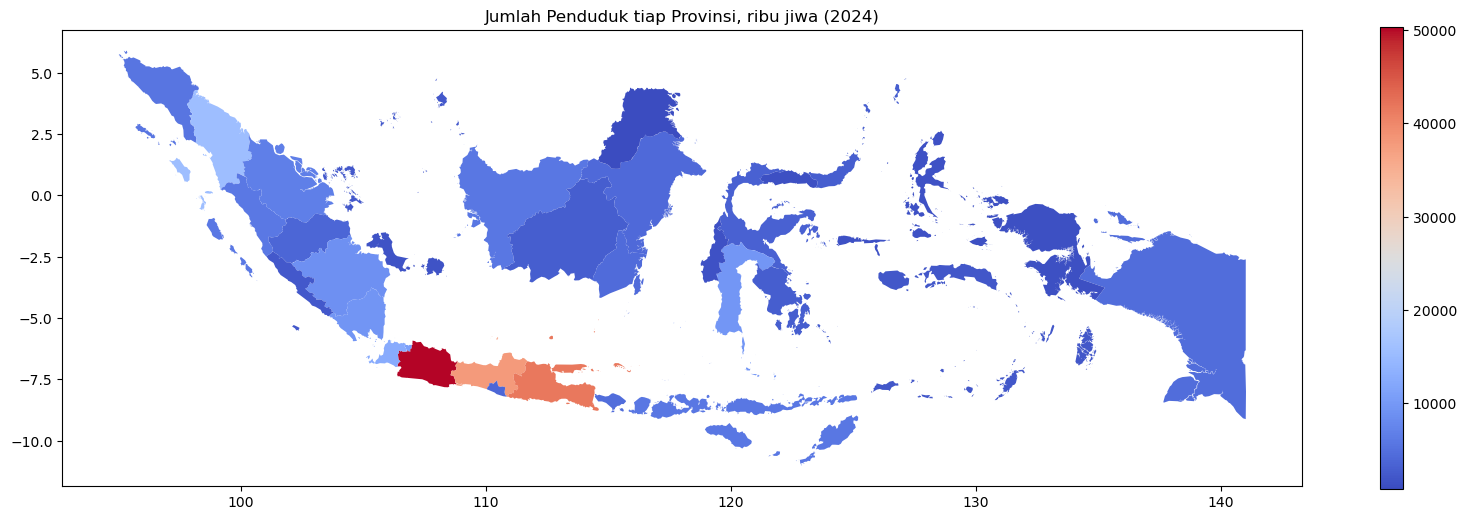

In [8]:
# Population (2024) map, Indonesia

plot_map(df, "Penduduk_2024")
plt.title("Jumlah Penduduk tiap Provinsi, ribu jiwa (2024)")
plt.savefig("penduduk2024_indo.png", bbox_inches="tight", dpi=300)

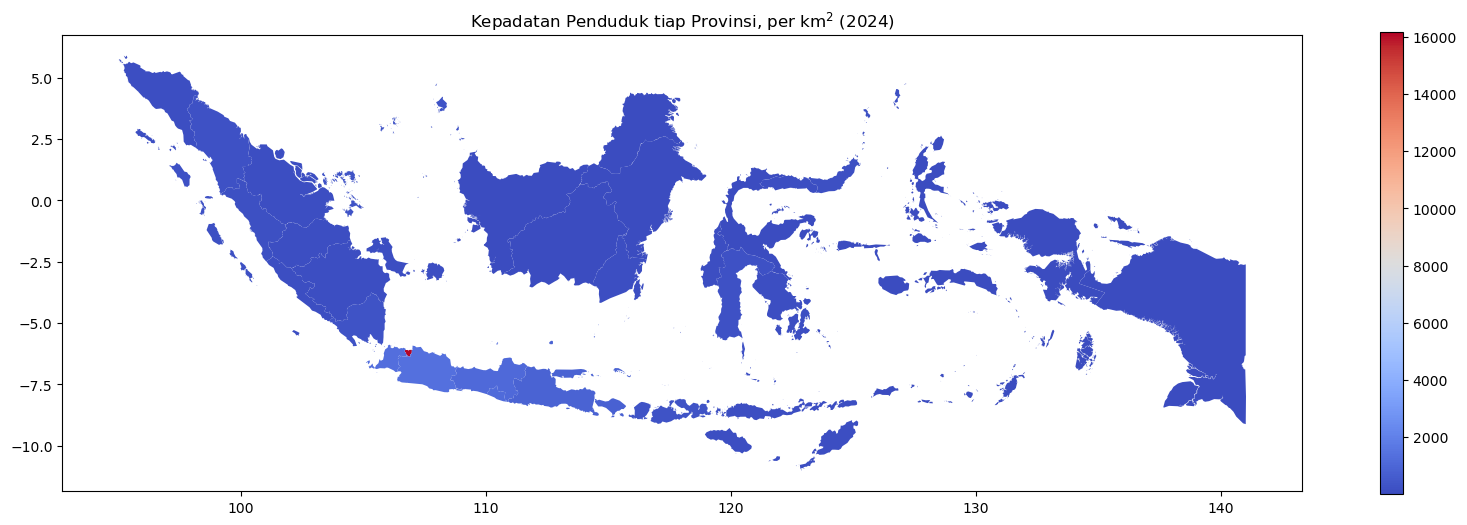

In [9]:
# Population density (2024) map, Indonesia

plot_map(df, "Kepadatan_Penduduk_2024")
plt.title(r"Kepadatan Penduduk tiap Provinsi, per km$^2$ (2024)")
plt.savefig("padat2024_indo.png", bbox_inches="tight", dpi=300)

In [10]:
# Java Island data

df_java = df.iloc[10:16]
df_java = df_java.reset_index(drop=True)
df_java

,cartodb_id,country,id_1,slug,state,geometry,Penduduk_2024,Luas_Wilayah_km2,Kepadatan_Penduduk_2024
0,25,Indonesia,8,indonesia-jakartaraya,DKI Jakarta,"MULTIPOLYGON (((106.71868 -6.22328, 106.72036 ...",10684.9,660.98,16165.239490
1,22,Indonesia,10,indonesia-jawabarat,Jawa Barat,"MULTIPOLYGON (((108.56916 -6.70834, 108.6025 -...",50345.2,37044.86,1359.033345
2,23,Indonesia,11,indonesia-jawatengah,Jawa Tengah,"MULTIPOLYGON (((111.69288 -6.75461, 111.65528 ...",37892.3,34337.49,1103.525622
3,8,Indonesia,34,indonesia-yogyakarta,DI Yogyakarta,"MULTIPOLYGON (((110.70204 -8.18505, 110.43472 ...",3759.5,3170.65,1185.719017
4,4,Indonesia,12,indonesia-jawatimur,Jawa Timur,"MULTIPOLYGON (((113.59208 -7.71486, 113.66695 ...",41814.5,48036.84,870.467333
5,30,Indonesia,4,indonesia-banten,Banten,"MULTIPOLYGON (((106.27354 -5.8075, 106.29469 -...",12431.4,9352.77,1329.167723


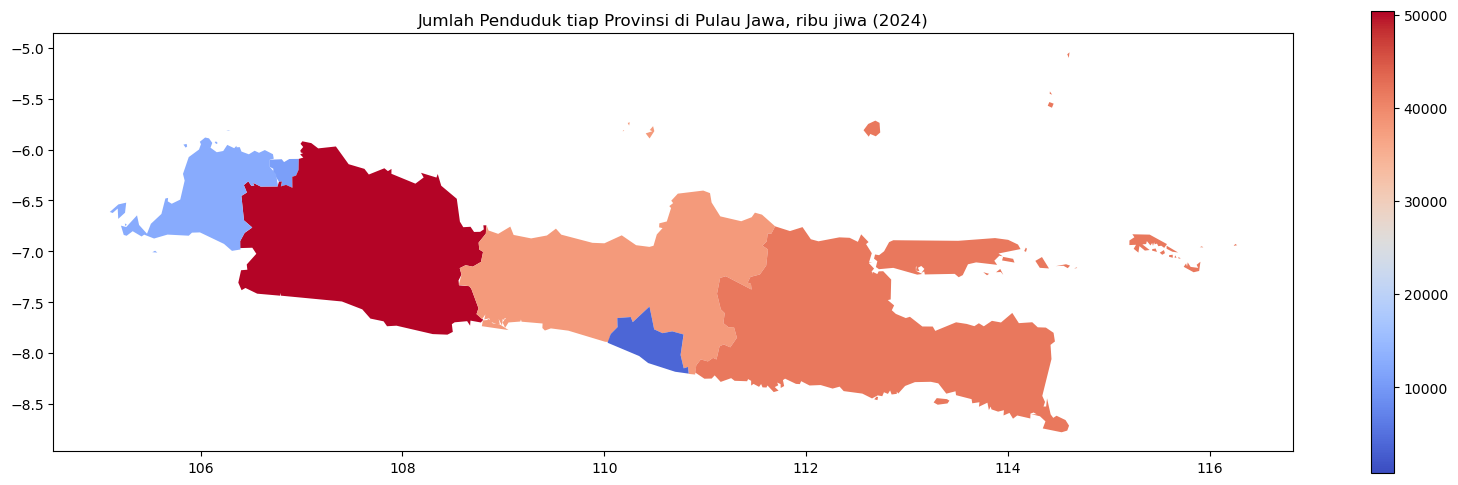

In [11]:
# Population (2024) in Java map, Indonesia

plot_map(df_java, "Penduduk_2024")
plt.title("Jumlah Penduduk tiap Provinsi di Pulau Jawa, ribu jiwa (2024)")
plt.savefig("penduduk2024_jawa.png", bbox_inches="tight", dpi=300)

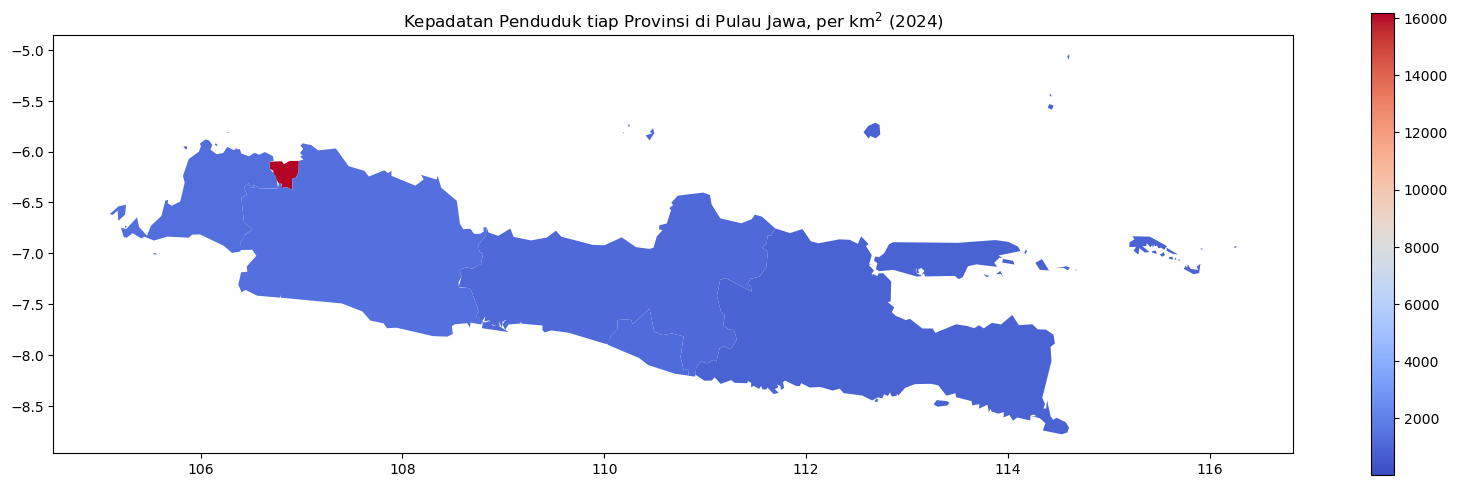

In [12]:
# Population density (2024) in Java map, Indonesia

plot_map(df_java, "Kepadatan_Penduduk_2024")
plt.title(r"Kepadatan Penduduk tiap Provinsi di Pulau Jawa, per km$^2$ (2024)")
plt.savefig("padat2024_jawa.png", bbox_inches="tight", dpi=300)

In [13]:
# Function for bar chart

def plot_bar(df_input, column_name, c):
    #df_input = df_input.sort_values(column_name, ascending=False, ignore_index=True)

    # Identify the largest and lowest values and their indices
    max_value = df_input[column_name].max()
    min_value = df_input[column_name].min()
    max_index = df_input[column_name].idxmax()
    min_index = df_input[column_name].idxmin()

    # Define bar colors: highlight the max value with a different color
    bar_colors = [
        "red" if i == max_index else "dodgerblue" if i == min_index else c
        for i in df_input.index
    ]
    
    fig, ax = plt.subplots(1, 1, figsize=(20, 6))

    ax.bar(df_input["state"], df_input[column_name], 
           color=bar_colors, width=0.75, zorder=3
          )

    ylabel_add = [min(df_input[column_name]), 
                  max(df_input[column_name])]

    ylabel_rou = [round(ylabel_add[0], 1), 
                  round(ylabel_add[1], 1)]
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    # Primary y-axis (left)
    ax.set_yscale("log")
    ax.grid(visible=True, axis="y", which="major")
    ax.set_zorder(2)
    ax.patch.set_visible(False) 

    """
    # Secondary y-axis (right)
    ax_right = ax.twinx()
    ax_right.set_ylim(ax.get_ylim())
    ax_right.set_yscale("log")
    ax_right.set_yticks(ylabel_add)
    ax_right.set_yticklabels(ylabel_rou)
    ax_right.grid(visible=True, axis="y", which="major")
    ax_right.set_zorder(1)
    """
    
    ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

    
    # Add a color bar to indicate the meaning of the highlighted bar (optional)
    ax.text(df_input["state"].iloc[max_index], max_value, ylabel_rou[1], color="red", 
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    ax.text(df_input["state"].iloc[min_index], min_value, ylabel_rou[0], color="dodgerblue", 
            ha="center", va="bottom", fontsize=10, fontweight="bold")
    

C:\Users\Zaini\AppData\Local\Temp\ipykernel_15724\2055930373.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


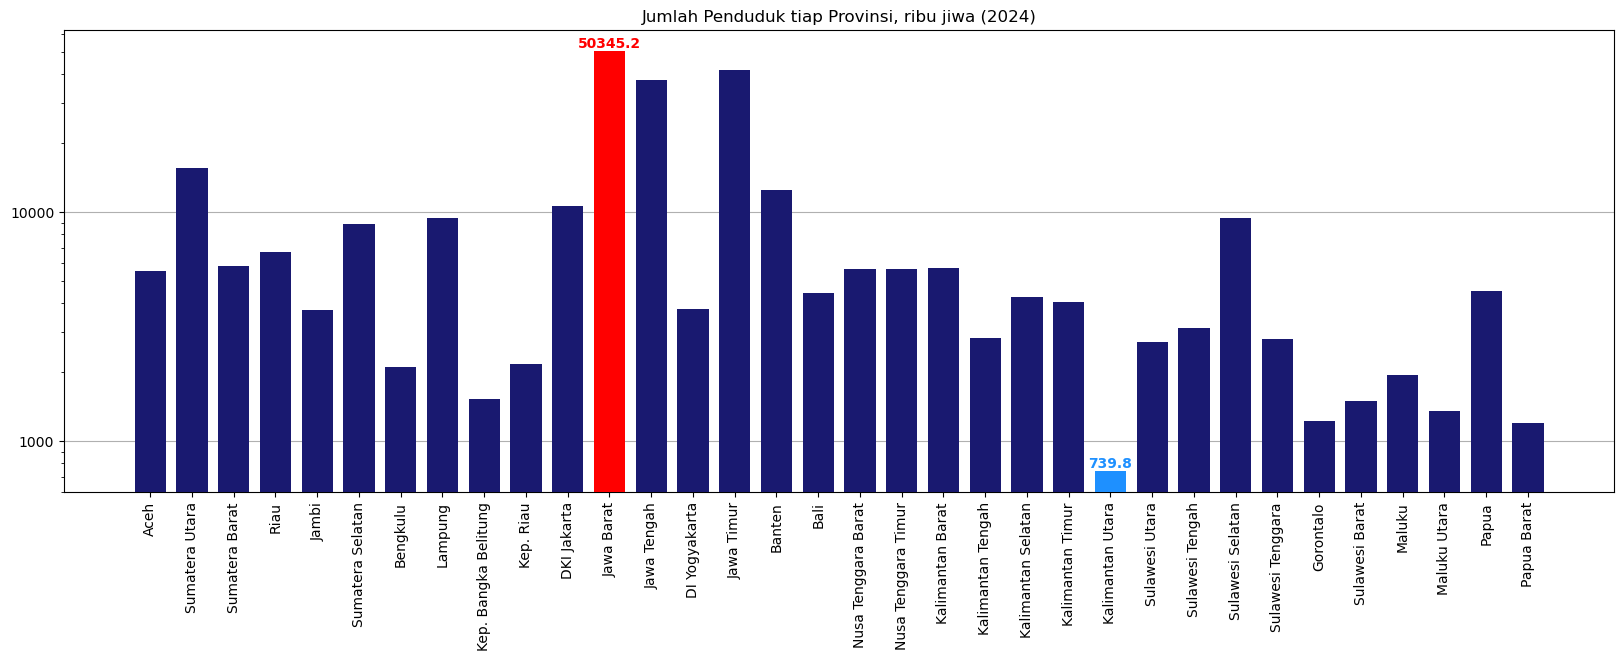

In [14]:
# Population (2024) bar chart, Indonesia

plot_bar(df, "Penduduk_2024", "midnightblue")
plt.title("Jumlah Penduduk tiap Provinsi, ribu jiwa (2024)")
plt.savefig("penduduk2024_indo_bar.png", bbox_inches="tight", dpi=300)

C:\Users\Zaini\AppData\Local\Temp\ipykernel_15724\2055930373.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


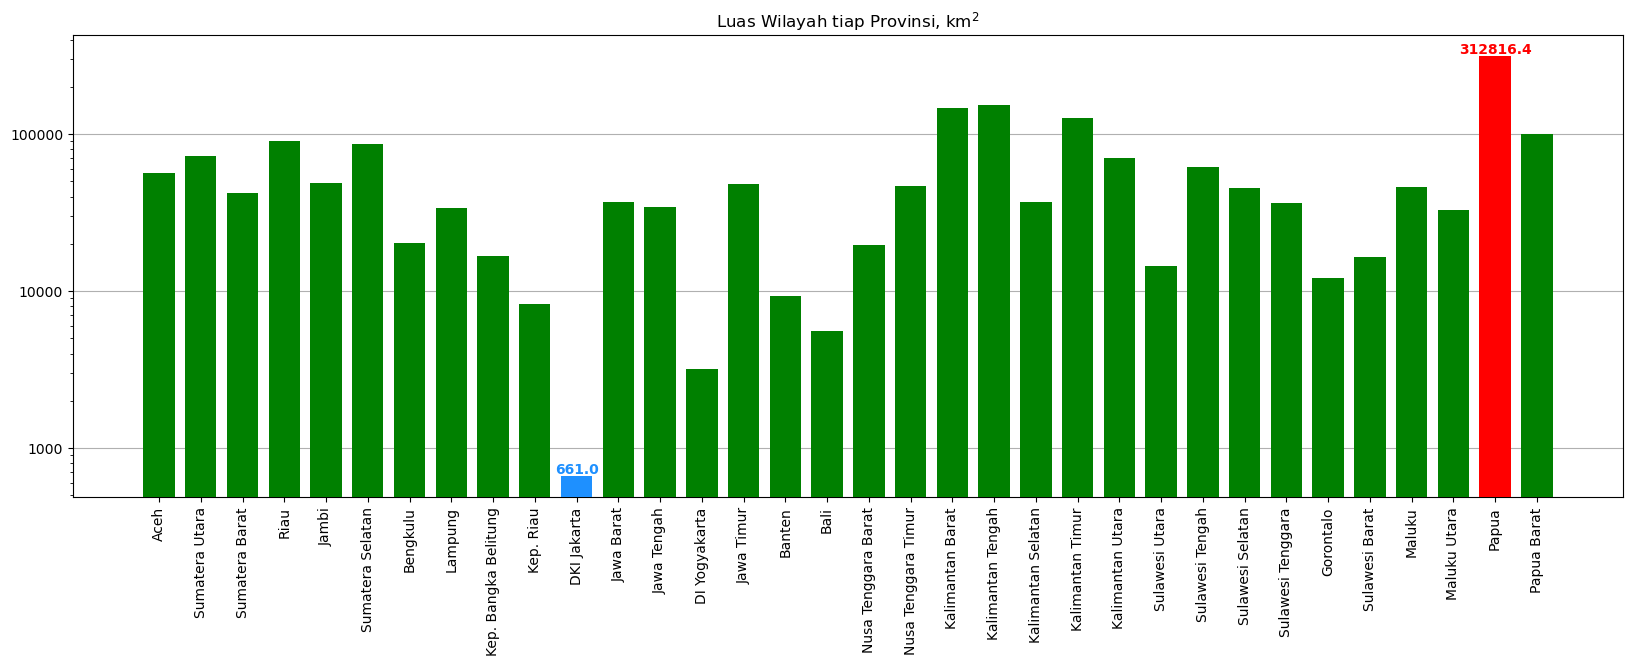

In [15]:
# Province area bar chart, Indonesia

plot_bar(df, "Luas_Wilayah_km2", "green")
plt.title(r"Luas Wilayah tiap Provinsi, km$^2$")
plt.savefig("luas2024_indo_bar.png", bbox_inches="tight", dpi=300)

C:\Users\Zaini\AppData\Local\Temp\ipykernel_15724\2055930373.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


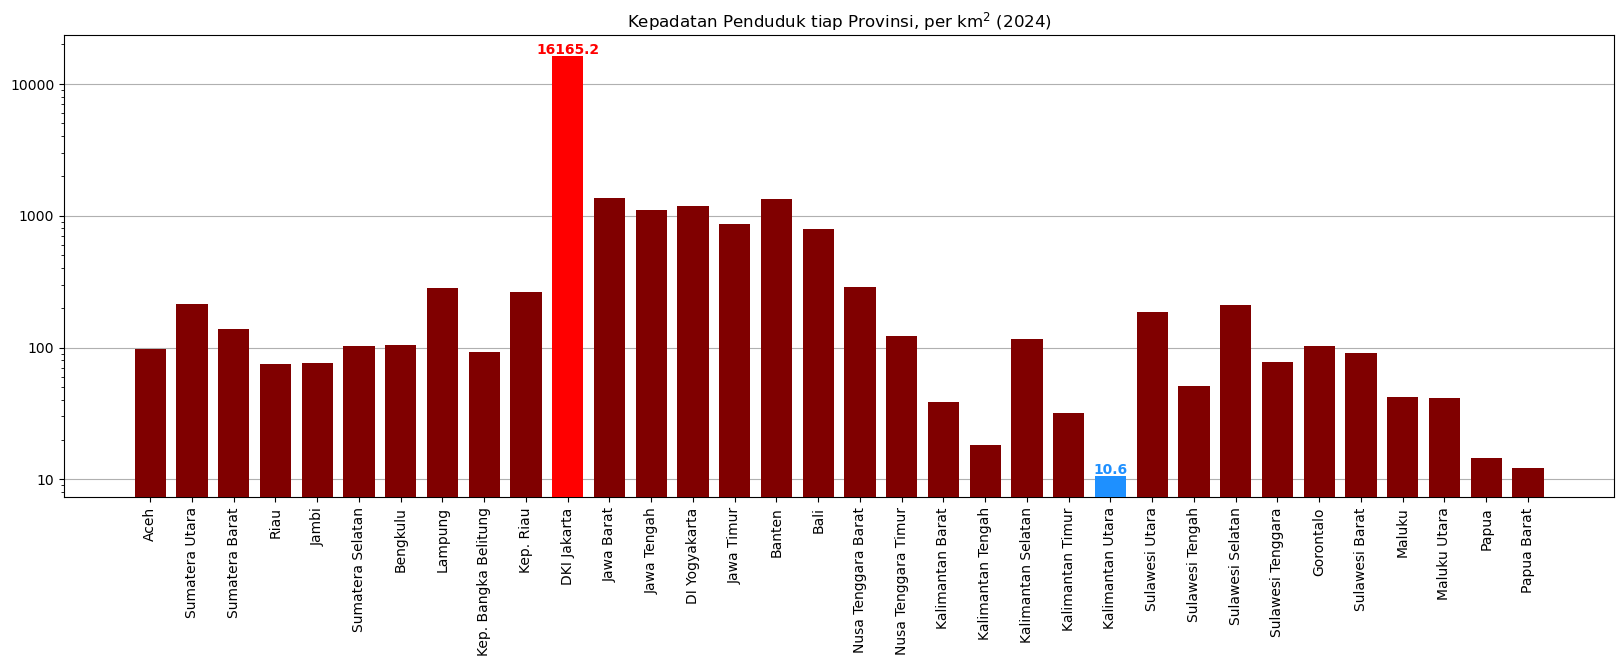

In [16]:
# Population density (2024) bar chart, Indonesia

plot_bar(df, "Kepadatan_Penduduk_2024", "maroon")
plt.title(r"Kepadatan Penduduk tiap Provinsi, per km$^2$ (2024)")
plt.savefig("padat2024_indo_bar.png", bbox_inches="tight", dpi=300)

In [17]:
# Provinsi Jawa Barat memiliki penduduk terbanyak
# Provinsi Papua memiliki wilayah terluas
# Provinsi DKI Jakarta memiliki kepadatan penduduk tertinggi

# Perbandingan kepadatan penduduk Jawa Barat terhadap DKI Jakarta sangat besar (1359.033345 vs 16165.23949)
# 6 provinsi yang memiliki kepadatan penduduk tertinggi semuanya berada di Pulau Jawa